# GT Sports Innovation Hackathon

### Library

In [1]:
# Import all libraries needed for this Jupyter notebook
import os
import time
import math
import pickle 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.svm import SVR
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from datetime import datetime, timedelta
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, Matern, WhiteKernel

### Tic

In [2]:
# Start to measure elapsed time
start_time = time.time()
print('Start time:')
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

Start time:


'2020-02-22 23:54:02'

### Part I

In [3]:
data=pd.read_csv("Braves Baseball Data_v3.csv")
data.head()

,Unnamed: 0,Date,Weekend,Avg Temp,HOME =1 Away =0,Braves,Opponnent Score,Winning Percentage,Rank Lead,Day (D) or Night (N),Streak,Rescheduled Game? (1= Yes),OPPONENTS WINNING PERCENTAGE,NLE Division Rival,Braves Promotions,Attendance
0,0,"Tuesday, Jul 2",0,85.5,1,0,2,0.581395,4.5,2,-1,0,0.473684,True,2,40180
1,1,"Wednesday, Jul 3",0,84.0,1,9,2,0.586207,5.5,2,1,0,0.468750,True,2,40147
2,2,"Thursday, Jul 4",0,86.0,1,12,6,0.590909,6.0,2,2,0,0.463918,True,2,40633
3,3,"Friday, Jul 5",0,84.0,1,1,0,0.595506,6.5,2,3,0,0.372093,True,1,41102
4,4,"Saturday, Jul 6",1,83.0,1,4,5,0.588889,6.0,1,-1,0,0.379310,True,2,37216


In [4]:
data=data.dropna()

### Use the following plot to analyse the attendance data
Skewness:
    -Is the degree of distortion from the symmetrical bell curve or the normal curve.
    -So, a symmetrical distribution will have a skewness of "0"
    =There are two types of Skewness: Positive and Negative.
    -Positive Skewness(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter.
    -In positive Skewness the mean and median will be greater than the mode. This is similar to this dataset. So, in Layman's terms, more houses were sold by less than the average price.
    -Negative Skewness means the tail on the left side of the distribution is longer and fatter.
    -In negative Skewness the mean and median will be less than the mode.
Skewness differentiates extreme values in one versus the other tail.

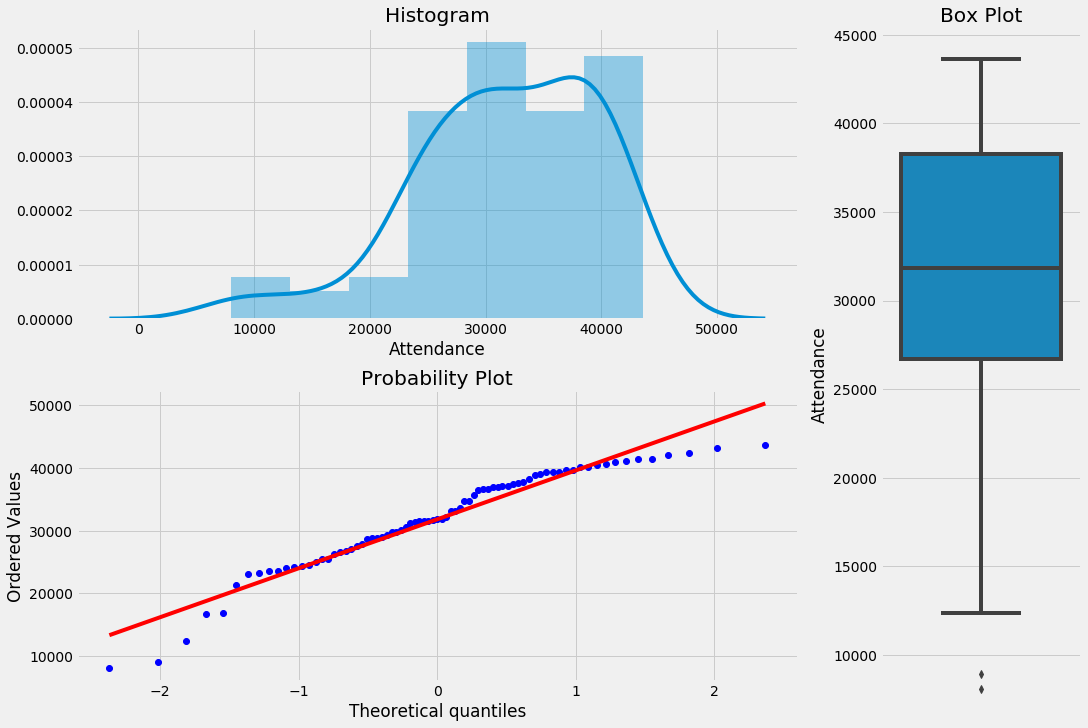

In [5]:
def plotting_3_chart(df, feature):
    style.use("fivethirtyeight")
    fig=plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1=fig.add_subplot(grid[0,:2])
    ax1.set_title("Histogram")
    sns.distplot(df.loc[:,feature],norm_hist=True,ax=ax1)
     # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)
    ax3=fig.add_subplot(grid[:,2])
    ax3.set_title("Box Plot")
    sns.boxplot(df.loc[:,feature],orient='v',ax=ax3);
plotting_3_chart(data,'Attendance')

In [6]:
(data.corr()**2)['Attendance'].sort_values(ascending = False)[1:]

OPPONENTS WINNING PERCENTAGE    0.172505
HOME =1 Away =0                 0.124942
Weekend                         0.106789
Unnamed: 0                      0.078880
NLE Division Rival              0.040462
Braves Promotions               0.038100
Streak                          0.011180
Avg Temp                        0.006748
Braves                          0.003438
Opponnent Score                 0.002681
Rank Lead                       0.001645
Day (D) or Night (N)            0.001557
Rescheduled Game? (1= Yes)      0.000868
Winning Percentage              0.000295
Name: Attendance, dtype: float64

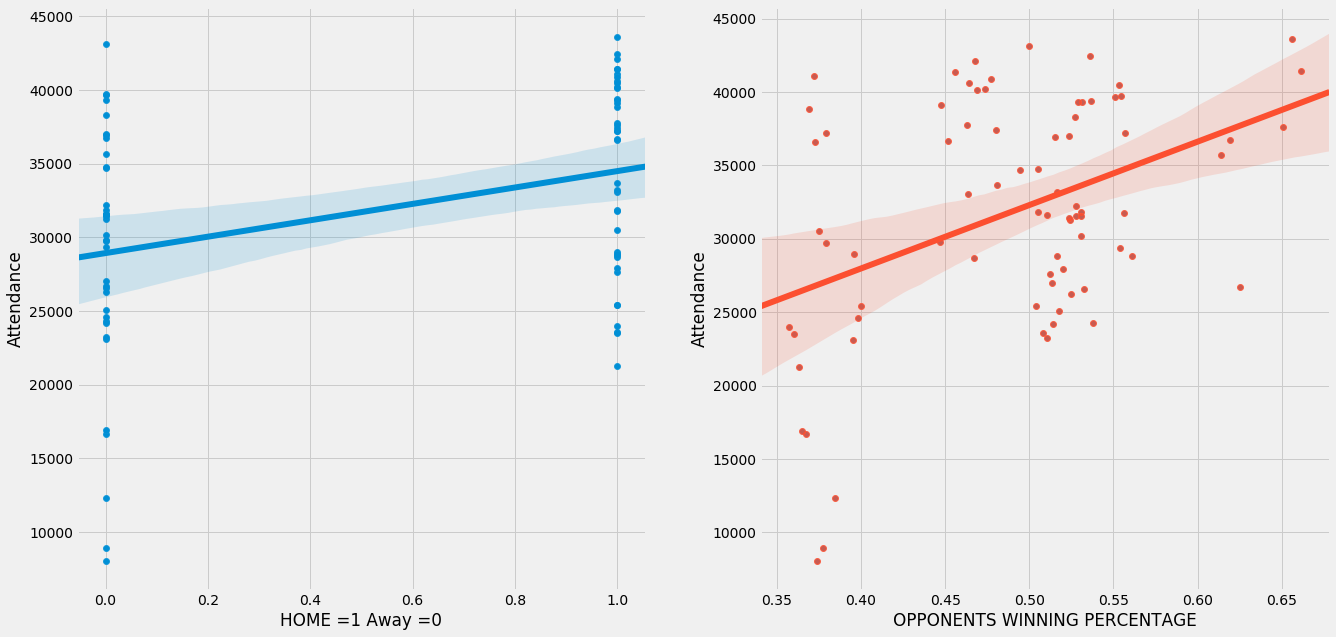

In [7]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols=2,sharey=False)
## Scatter plotting for Y and X1. 
sns.scatterplot( x = data["HOME =1 Away =0"], y = data["Attendance"],  ax=ax1)
## Putting a regression line. 
sns.regplot(x = data["HOME =1 Away =0"], y=data["Attendance"], ax=ax1)

## Scatter plotting for Y and X2. 
sns.scatterplot(data["OPPONENTS WINNING PERCENTAGE"],y =data["Attendance"], ax=ax2)
## regression line for X2 and Y. 
sns.regplot(data["OPPONENTS WINNING PERCENTAGE"], y=data["Attendance"], ax=ax2);

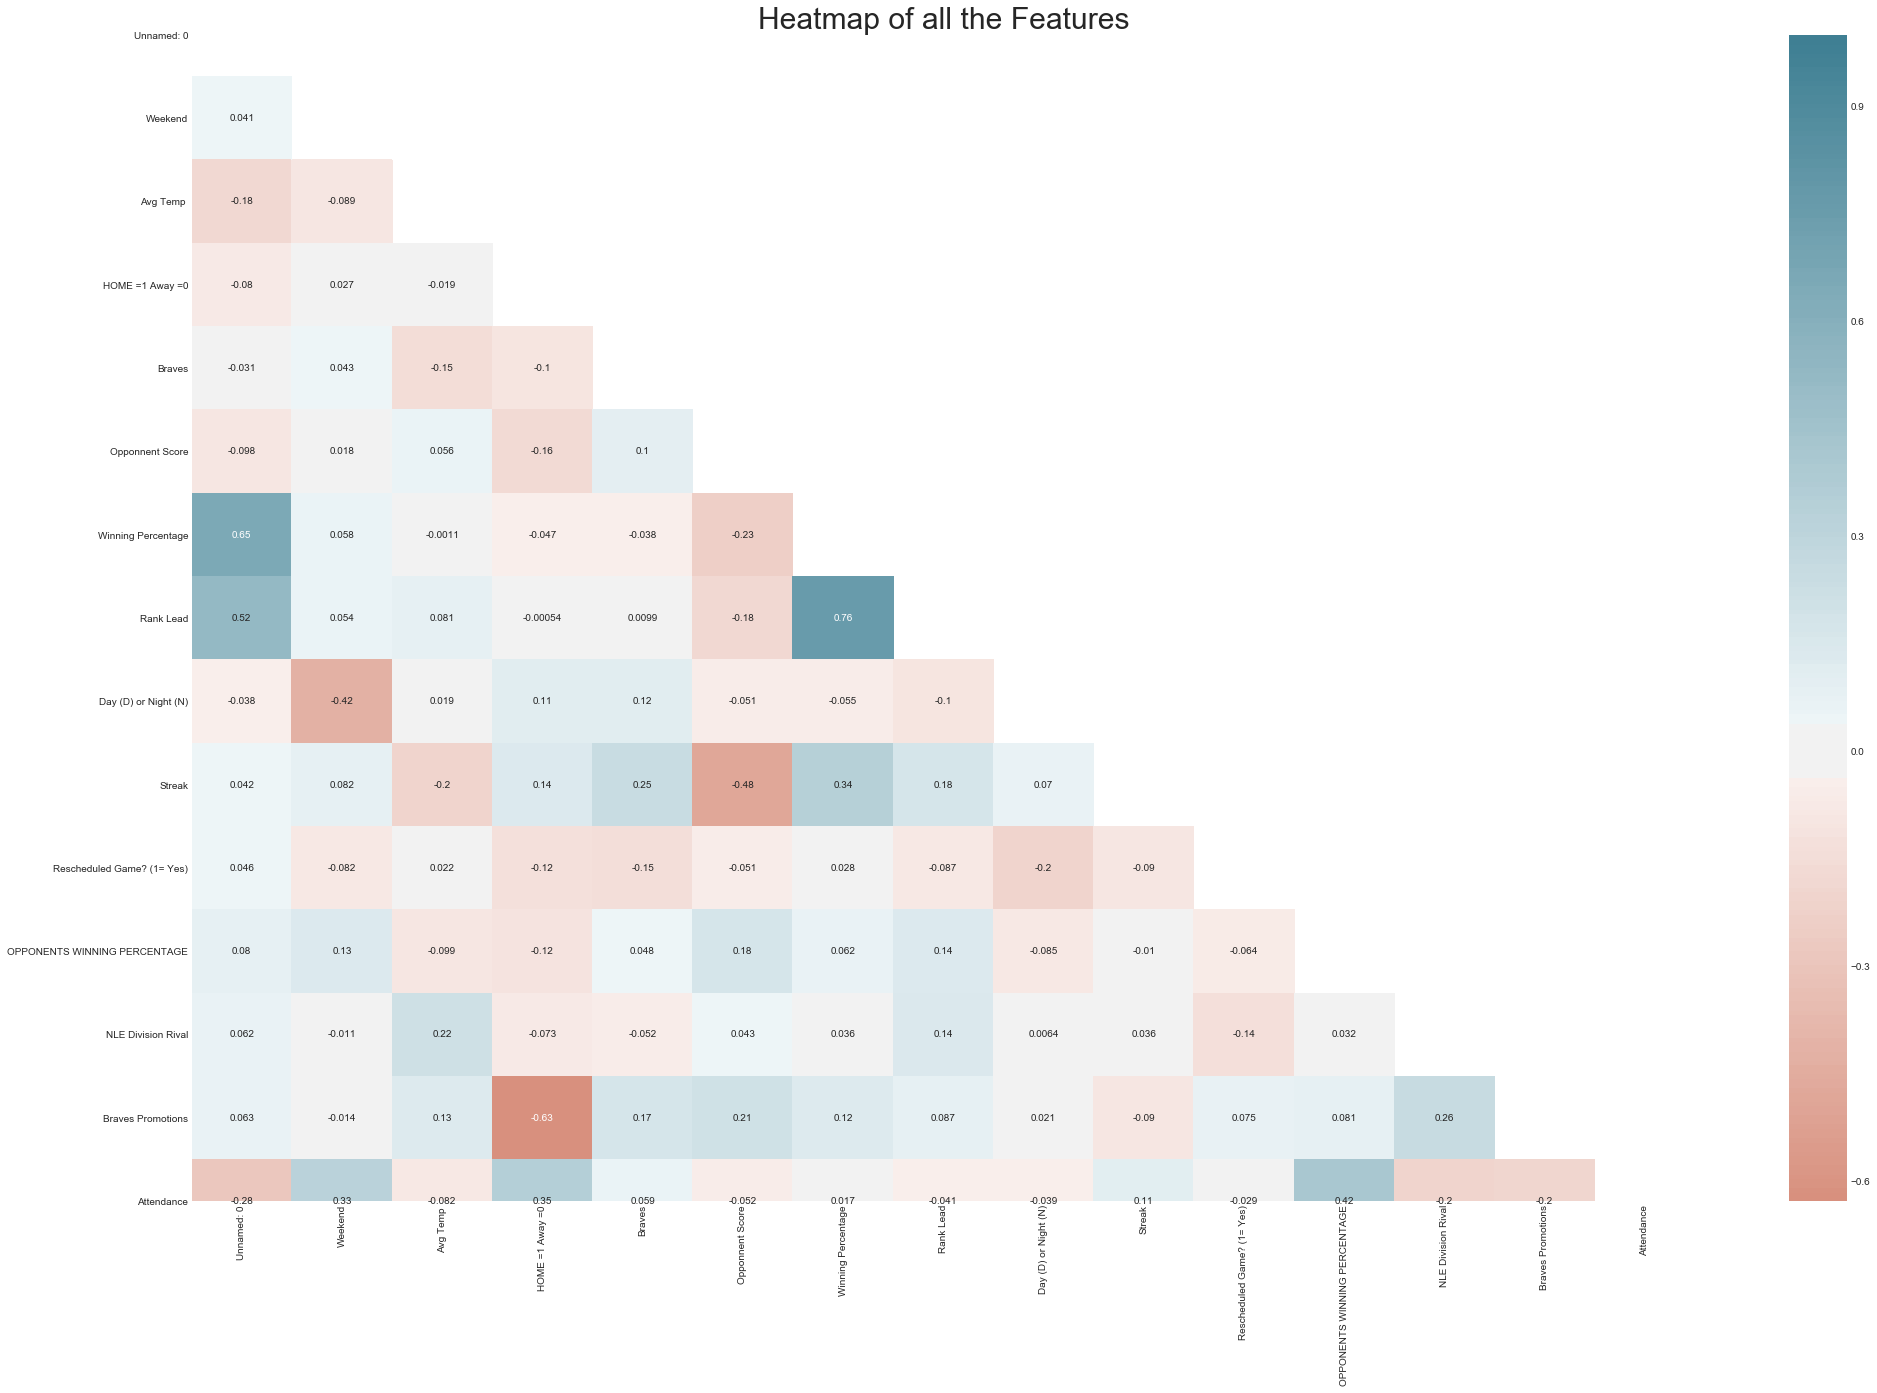

In [8]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

### Linear Regression

 Linear Regression, one of the most basic and straightforward models. Many of us may have learned to show the relationship between two variable using something called "y equals mX plus b." Let's refresh our memory and call upon on that equation.
 \begin{align}
\dot{y} & = \beta_0+ \beta_1 X +\epsilon\\
\end{align}

Now, we need to introduce a evaluation metric that will help us compare and contrast models. One of them is mean squared error(MSE) which we used while comparing models
 \begin{align}
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y_i}-y_i)^2}\\
\end{align}
Mean Squared Error
 \begin{align}
MSE =\frac{1}{n}\sum_{i=1}^n(\hat{y_i}-y_i)^2\\
\end{align}

In [9]:
X=data[['Avg Temp ','OPPONENTS WINNING PERCENTAGE','NLE Division Rival','Braves Promotions']]
y=data['Attendance']

In [10]:
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

In [11]:
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

In [12]:
## get average squared error(MSE) by comparing predicted values with real values. 
print ('%.2f'%mean_squared_error(y_test, y_pred))

45543114.79


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, X,y,cv = cv, scoring = 'neg_mean_absolute_error')
print ('%.8f'%scores.mean())

-5957.57626611


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
features= PolynomialFeatures(degree=7)
New= features.fit_transform(X_train)
full_polynomial_model = LinearRegression()
full_polynomial_model.fit(New,y_train)
print("The model explains {:.2f}% of the average attendence.".format(full_polynomial_model.score(New,y_train)*100))

The model explains 91.80% of the average attendence.


### Test Polynomial Regression Machine Learning Model

In [15]:
New_test= features.fit_transform(X)
full_polynomial_model = LinearRegression()
full_polynomial_model.fit(New_test,y)
print("The model explains {:.2f}% of the average attendence.".format(full_polynomial_model.score(New_test,y)*100))

The model explains 78.89% of the average attendence.


## Tend to non Linear Models

### Input data

In [16]:
# Import input data
database = pd.read_csv('Input_sample.csv')  

# Specify input
database_v1 = data['OPPONENTS WINNING PERCENTAGE']
database_v2 = data['Avg Temp ']
database_v3 = data['NLE Division Rival']
database_v4 = data['Braves Promotions']
database_v5 = data['HOME =1 Away =0']
database_v6 = data['Weekend']

# Specify output
database_y = data['Attendance']  

### Data pre-processing

In [17]:
# Convert Pandas to Numpy dataframe
database_v1_array = np.array(database_v1, dtype='float64')
database_v2_array = np.array(database_v2, dtype='float64')
database_v3_array = np.array(database_v3, dtype='float64')
database_v4_array = np.array(database_v4, dtype='float64')
database_v5_array = np.array(database_v5, dtype='float64')
database_v6_array = np.array(database_v6, dtype='float64')

# Create an input/output array 
database_x_array = np.column_stack((database_v1_array, database_v2_array, database_v3_array, database_v4_array,database_v5_array,database_v6_array))
database_y_array = np.array(database_y, dtype='float64')

# Normalize the x database 
normalization_scale = MinMaxScaler(feature_range=(0,1))
normalization_scale = normalization_scale.fit(database_x_array)
database_x_normalization = normalization_scale.transform(database_x_array)

# Split the database into train and validation datasets randomly
training_x, validation_x, training_y, validation_y = train_test_split(database_x_normalization, database_y_array, test_size=0.2, random_state=0)

### Neural Network (NN)

In [18]:
# User-defined for MLP model
number_of_node = 100
hidden_layer_structure = (number_of_node, number_of_node)  ## Note that hidden_layer_sizes=(n,n) means two hidden layer with each n neurons. If (n,n,n), it represents three hidden layers
learningRate = 0.001  # Default 0.001
maxIter = 5000
regularizationPenalty = 0.0001  # Default 0.0001
earlyStopping = False  ## Set aside 10% of training data as validation and terminate training when validation score is not improving by the tolerance
batchSize = 'auto'  # When set to auto, it means batch_size = min(200, n_samples)
tolerance = 1e-06  # When the loss or score is not improving by at least this tolerance, the weight optimization algorithm terminates

In [19]:
# Select a gradient descent method
#gradient_method = 'lbfgs'  # BFGS, quasi-Newton method
#gradient_method = 'sgd'  # Stochastic Gradient Descent 
gradient_method = 'adam'  # Adaptive Moment Estimation 

In [20]:
# Select an activation function 
#activation_function = 'relu'  # Rectified linear unit function
activation_function = 'tanh'  # Hyperbolic tangent function
#activation_function = 'logistic'  # Logistic sigmoid function

In [21]:
# Train a model with small dataset 
#model = MLPRegressor(hidden_layer_sizes=(number_of_node,number_of_node), activation=activation_function, solver=gradient_method, learning_rate_init=learningRate, max_iter=maxIter, tol=tolerance, verbose=True)
#model.fit(training_x, training_y)

# Train a model with large dataset (More than 1000)
NN_model = MLPRegressor(hidden_layer_sizes=hidden_layer_structure, activation=activation_function, solver=gradient_method, alpha=regularizationPenalty, learning_rate_init=learningRate, batch_size=batchSize, early_stopping=earlyStopping, max_iter=maxIter, tol=tolerance, verbose=True)

### NN Training

In [22]:
# Perform model fit
NN_model = NN_model.fit(training_x, training_y)

Iteration 1, loss = 549324775.73462033
Iteration 2, loss = 549315559.96324229
Iteration 3, loss = 549306303.33546913
Iteration 4, loss = 549296994.08276296
Iteration 5, loss = 549287620.53423107
Iteration 6, loss = 549278170.17076695
Iteration 7, loss = 549268630.35800755
Iteration 8, loss = 549258989.07040501
Iteration 9, loss = 549249235.60496974
Iteration 10, loss = 549239360.92001355
Iteration 11, loss = 549229357.67776155
Iteration 12, loss = 549219220.16328204
Iteration 13, loss = 549208944.26063991
Iteration 14, loss = 549198527.63503146
Iteration 15, loss = 549187970.08333242
Iteration 16, loss = 549177273.88856995
Iteration 17, loss = 549166444.02089596
Iteration 18, loss = 549155488.15124202
Iteration 19, loss = 549144416.54711413
Iteration 20, loss = 549133241.91655219
Iteration 21, loss = 549121979.22049546
Iteration 22, loss = 549110645.45042455
Iteration 23, loss = 549099259.36669791
Iteration 24, loss = 549087841.19802082
Iteration 25, loss = 549076412.30742383
Iteration

Iteration 265, loss = 547988026.15905285
Iteration 266, loss = 547984559.50785255
Iteration 267, loss = 547981093.90920234
Iteration 268, loss = 547977629.35416496
Iteration 269, loss = 547974165.83391678
Iteration 270, loss = 547970703.33974767
Iteration 271, loss = 547967241.86305749
Iteration 272, loss = 547963781.39535511
Iteration 273, loss = 547960321.92825675
Iteration 274, loss = 547956863.45348310
Iteration 275, loss = 547953405.96285915
Iteration 276, loss = 547949949.44831097
Iteration 277, loss = 547946493.90186512
Iteration 278, loss = 547943039.31564641
Iteration 279, loss = 547939585.68187642
Iteration 280, loss = 547936132.99287188
Iteration 281, loss = 547932681.24104369
Iteration 282, loss = 547929230.41889405
Iteration 283, loss = 547925780.51901650
Iteration 284, loss = 547922331.53409374
Iteration 285, loss = 547918883.45689619
Iteration 286, loss = 547915436.28028035
Iteration 287, loss = 547911989.99718833
Iteration 288, loss = 547908544.60064530
Iteration 289, l

Iteration 572, loss = 546951206.46575630
Iteration 573, loss = 546947881.08320808
Iteration 574, loss = 546944555.90393341
Iteration 575, loss = 546941230.92721653
Iteration 576, loss = 546937906.15234613
Iteration 577, loss = 546934581.57861459
Iteration 578, loss = 546931257.20531845
Iteration 579, loss = 546927933.03175771
Iteration 580, loss = 546924609.05723679
Iteration 581, loss = 546921285.28106332
Iteration 582, loss = 546917961.70254910
Iteration 583, loss = 546914638.32100940
Iteration 584, loss = 546911315.13576341
Iteration 585, loss = 546907992.14613402
Iteration 586, loss = 546904669.35144758
Iteration 587, loss = 546901346.75103450
Iteration 588, loss = 546898024.34422827
Iteration 589, loss = 546894702.13036656
Iteration 590, loss = 546891380.10879004
Iteration 591, loss = 546888058.27884340
Iteration 592, loss = 546884736.63987422
Iteration 593, loss = 546881415.19123447
Iteration 594, loss = 546878093.93227875
Iteration 595, loss = 546874772.86236537
Iteration 596, l

Iteration 774, loss = 546282843.90720952
Iteration 775, loss = 546279548.97268736
Iteration 776, loss = 546276254.15023017
Iteration 777, loss = 546272959.43956113
Iteration 778, loss = 546269664.84040475
Iteration 779, loss = 546266370.35248625
Iteration 780, loss = 546263075.97553205
Iteration 781, loss = 546259781.70926964
Iteration 782, loss = 546256487.55342793
Iteration 783, loss = 546253193.50773644
Iteration 784, loss = 546249899.57192588
Iteration 785, loss = 546246605.74572837
Iteration 786, loss = 546243312.02887666
Iteration 787, loss = 546240018.42110479
Iteration 788, loss = 546236724.92214751
Iteration 789, loss = 546233431.53174150
Iteration 790, loss = 546230138.24962354
Iteration 791, loss = 546226845.07553160
Iteration 792, loss = 546223552.00920510
Iteration 793, loss = 546220259.05038440
Iteration 794, loss = 546216966.19881034
Iteration 795, loss = 546213673.45422542
Iteration 796, loss = 546210380.81637311
Iteration 797, loss = 546207088.28499711
Iteration 798, l

Iteration 1082, loss = 545272275.69601345
Iteration 1083, loss = 545269005.98594201
Iteration 1084, loss = 545265736.33624959
Iteration 1085, loss = 545262466.74683702
Iteration 1086, loss = 545259197.21760654
Iteration 1087, loss = 545255927.74846005
Iteration 1088, loss = 545252658.33929980
Iteration 1089, loss = 545249388.99002826
Iteration 1090, loss = 545246119.70054841
Iteration 1091, loss = 545242850.47076297
Iteration 1092, loss = 545239581.30057585
Iteration 1093, loss = 545236312.18989015
Iteration 1094, loss = 545233043.13861024
Iteration 1095, loss = 545229774.14664042
Iteration 1096, loss = 545226505.21388447
Iteration 1097, loss = 545223236.34024739
Iteration 1098, loss = 545219967.52563429
Iteration 1099, loss = 545216698.76995027
Iteration 1100, loss = 545213430.07310104
Iteration 1101, loss = 545210161.43499219
Iteration 1102, loss = 545206892.85552967
Iteration 1103, loss = 545203624.33462012
Iteration 1104, loss = 545200355.87216985
Iteration 1105, loss = 545197087.4

Iteration 1292, loss = 544586830.59075904
Iteration 1293, loss = 544583571.75114608
Iteration 1294, loss = 544580312.95603359
Iteration 1295, loss = 544577054.20536387
Iteration 1296, loss = 544573795.49907994
Iteration 1297, loss = 544570536.83712459
Iteration 1298, loss = 544567278.21944070
Iteration 1299, loss = 544564019.64597178
Iteration 1300, loss = 544560761.11666036
Iteration 1301, loss = 544557502.63145053
Iteration 1302, loss = 544554244.19028544
Iteration 1303, loss = 544550985.79310870
Iteration 1304, loss = 544547727.43986440
Iteration 1305, loss = 544544469.13049614
Iteration 1306, loss = 544541210.86494815
Iteration 1307, loss = 544537952.64316440
Iteration 1308, loss = 544534694.46508956
Iteration 1309, loss = 544531436.33066750
Iteration 1310, loss = 544528178.23984325
Iteration 1311, loss = 544524920.19256151
Iteration 1312, loss = 544521662.18876672
Iteration 1313, loss = 544518404.22840405
Iteration 1314, loss = 544515146.31141877
Iteration 1315, loss = 544511888.4

Iteration 1548, loss = 543753881.80640423
Iteration 1549, loss = 543750632.79524064
Iteration 1550, loss = 543747383.81733954
Iteration 1551, loss = 543744134.87266791
Iteration 1552, loss = 543740885.96119237
Iteration 1553, loss = 543737637.08287978
Iteration 1554, loss = 543734388.23769748
Iteration 1555, loss = 543731139.42561221
Iteration 1556, loss = 543727890.64659131
Iteration 1557, loss = 543724641.90060151
Iteration 1558, loss = 543721393.18761027
Iteration 1559, loss = 543718144.50758517
Iteration 1560, loss = 543714895.86049318
Iteration 1561, loss = 543711647.24630189
Iteration 1562, loss = 543708398.66497874
Iteration 1563, loss = 543705150.11649096
Iteration 1564, loss = 543701901.60080671
Iteration 1565, loss = 543698653.11789358
Iteration 1566, loss = 543695404.66771865
Iteration 1567, loss = 543692156.25025046
Iteration 1568, loss = 543688907.86545658
Iteration 1569, loss = 543685659.51330483
Iteration 1570, loss = 543682411.19376349
Iteration 1571, loss = 543679162.9

Iteration 1761, loss = 543062545.53998101
Iteration 1762, loss = 543059302.95403624
Iteration 1763, loss = 543056060.39551032
Iteration 1764, loss = 543052817.86438096
Iteration 1765, loss = 543049575.36062574
Iteration 1766, loss = 543046332.88422215
Iteration 1767, loss = 543043090.43514800
Iteration 1768, loss = 543039848.01338077
Iteration 1769, loss = 543036605.61889803
Iteration 1770, loss = 543033363.25167763
Iteration 1771, loss = 543030120.91169715
Iteration 1772, loss = 543026878.59893465
Iteration 1773, loss = 543023636.31336761
Iteration 1774, loss = 543020394.05497420
Iteration 1775, loss = 543017151.82373226
Iteration 1776, loss = 543013909.61961961
Iteration 1777, loss = 543010667.44261432
Iteration 1778, loss = 543007425.29269445
Iteration 1779, loss = 543004183.16983795
Iteration 1780, loss = 543000941.07402301
Iteration 1781, loss = 542997699.00522768
Iteration 1782, loss = 542994456.96342993
Iteration 1783, loss = 542991214.94860828
Iteration 1784, loss = 542987972.9

Iteration 1964, loss = 542404834.26435602
Iteration 1965, loss = 542401596.83037734
Iteration 1966, loss = 542398359.41993201
Iteration 1967, loss = 542395122.03300405
Iteration 1968, loss = 542391884.66957700
Iteration 1969, loss = 542388647.32963467
Iteration 1970, loss = 542385410.01316118
Iteration 1971, loss = 542382172.72014022
Iteration 1972, loss = 542378935.45055592
Iteration 1973, loss = 542375698.20439196
Iteration 1974, loss = 542372460.98163283
Iteration 1975, loss = 542369223.78226209
Iteration 1976, loss = 542365986.60626364
Iteration 1977, loss = 542362749.45362198
Iteration 1978, loss = 542359512.32432103
Iteration 1979, loss = 542356275.21834469
Iteration 1980, loss = 542353038.13567734
Iteration 1981, loss = 542349801.07630301
Iteration 1982, loss = 542346564.04020584
Iteration 1983, loss = 542343327.02737021
Iteration 1984, loss = 542340090.03778005
Iteration 1985, loss = 542336853.07141995
Iteration 1986, loss = 542333616.12827396
Iteration 1987, loss = 542330379.2

Iteration 2187, loss = 541683441.77801371
Iteration 2188, loss = 541680209.23205912
Iteration 2189, loss = 541676976.70656323
Iteration 2190, loss = 541673744.20151472
Iteration 2191, loss = 541670511.71690178
Iteration 2192, loss = 541667279.25271273
Iteration 2193, loss = 541664046.80893612
Iteration 2194, loss = 541660814.38556015
Iteration 2195, loss = 541657581.98257327
Iteration 2196, loss = 541654349.59996367
Iteration 2197, loss = 541651117.23772025
Iteration 2198, loss = 541647884.89583111
Iteration 2199, loss = 541644652.57428479
Iteration 2200, loss = 541641420.27306998
Iteration 2201, loss = 541638187.99217474
Iteration 2202, loss = 541634955.73158813
Iteration 2203, loss = 541631723.49129820
Iteration 2204, loss = 541628491.27129388
Iteration 2205, loss = 541625259.07156336
Iteration 2206, loss = 541622026.89209557
Iteration 2207, loss = 541618794.73287880
Iteration 2208, loss = 541615562.59390175
Iteration 2209, loss = 541612330.47515333
Iteration 2210, loss = 541609098.3

Iteration 2396, loss = 541008268.02336752
Iteration 2397, loss = 541005039.52181232
Iteration 2398, loss = 541001811.03858948
Iteration 2399, loss = 540998582.57369041
Iteration 2400, loss = 540995354.12710619
Iteration 2401, loss = 540992125.69882822
Iteration 2402, loss = 540988897.28884733
Iteration 2403, loss = 540985668.89715505
Iteration 2404, loss = 540982440.52374232
Iteration 2405, loss = 540979212.16860056
Iteration 2406, loss = 540975983.83172119
Iteration 2407, loss = 540972755.51309526
Iteration 2408, loss = 540969527.21271408
Iteration 2409, loss = 540966298.93056905
Iteration 2410, loss = 540963070.66665125
Iteration 2411, loss = 540959842.42095208
Iteration 2412, loss = 540956614.19346309
Iteration 2413, loss = 540953385.98417521
Iteration 2414, loss = 540950157.79307985
Iteration 2415, loss = 540946929.62016892
Iteration 2416, loss = 540943701.46543312
Iteration 2417, loss = 540940473.32886398
Iteration 2418, loss = 540937245.21045327
Iteration 2419, loss = 540934017.1

Iteration 2595, loss = 540366146.64272153
Iteration 2596, loss = 540362921.62908328
Iteration 2597, loss = 540359696.63222337
Iteration 2598, loss = 540356471.65213490
Iteration 2599, loss = 540353246.68881142
Iteration 2600, loss = 540350021.74224544
Iteration 2601, loss = 540346796.81243050
Iteration 2602, loss = 540343571.89935958
Iteration 2603, loss = 540340347.00302589
Iteration 2604, loss = 540337122.12342262
Iteration 2605, loss = 540333897.26054299
Iteration 2606, loss = 540330672.41438007
Iteration 2607, loss = 540327447.58492720
Iteration 2608, loss = 540324222.77217734
Iteration 2609, loss = 540320997.97612393
Iteration 2610, loss = 540317773.19675994
Iteration 2611, loss = 540314548.43407893
Iteration 2612, loss = 540311323.68807375
Iteration 2613, loss = 540308098.95873809
Iteration 2614, loss = 540304874.24606466
Iteration 2615, loss = 540301649.55004716
Iteration 2616, loss = 540298424.87067854
Iteration 2617, loss = 540295200.20795238
Iteration 2618, loss = 540291975.5

Iteration 2810, loss = 539673144.13092589
Iteration 2811, loss = 539669922.57886243
Iteration 2812, loss = 539666701.04227018
Iteration 2813, loss = 539663479.52114403
Iteration 2814, loss = 539660258.01547801
Iteration 2815, loss = 539657036.52526724
Iteration 2816, loss = 539653815.05050635
Iteration 2817, loss = 539650593.59118998
Iteration 2818, loss = 539647372.14731264
Iteration 2819, loss = 539644150.71886909
Iteration 2820, loss = 539640929.30585420
Iteration 2821, loss = 539637707.90826249
Iteration 2822, loss = 539634486.52608895
Iteration 2823, loss = 539631265.15932786
Iteration 2824, loss = 539628043.80797422
Iteration 2825, loss = 539624822.47202265
Iteration 2826, loss = 539621601.15146816
Iteration 2827, loss = 539618379.84630501
Iteration 2828, loss = 539615158.55652833
Iteration 2829, loss = 539611937.28213263
Iteration 2830, loss = 539608716.02311265
Iteration 2831, loss = 539605494.77946329
Iteration 2832, loss = 539602273.55117941
Iteration 2833, loss = 539599052.3

Iteration 3014, loss = 539016260.80435717
Iteration 3015, loss = 539013042.30562186
Iteration 3016, loss = 539009823.82138181
Iteration 3017, loss = 539006605.35163355
Iteration 3018, loss = 539003386.89637220
Iteration 3019, loss = 539000168.45559359
Iteration 3020, loss = 538996950.02929366
Iteration 3021, loss = 538993731.61746800
Iteration 3022, loss = 538990513.22011268
Iteration 3023, loss = 538987294.83722293
Iteration 3024, loss = 538984076.46879494
Iteration 3025, loss = 538980858.11482453
Iteration 3026, loss = 538977639.77530706
Iteration 3027, loss = 538974421.45023882
Iteration 3028, loss = 538971203.13961530
Iteration 3029, loss = 538967984.84343219
Iteration 3030, loss = 538964766.56168568
Iteration 3031, loss = 538961548.29437113
Iteration 3032, loss = 538958330.04148483
Iteration 3033, loss = 538955111.80302203
Iteration 3034, loss = 538951893.57897913
Iteration 3035, loss = 538948675.36935151
Iteration 3036, loss = 538945457.17413521
Iteration 3037, loss = 538942238.9

Iteration 3224, loss = 538340688.04086494
Iteration 3225, loss = 538337472.49933410
Iteration 3226, loss = 538334256.97149754
Iteration 3227, loss = 538331041.45735204
Iteration 3228, loss = 538327825.95689416
Iteration 3229, loss = 538324610.47012043
Iteration 3230, loss = 538321394.99702752
Iteration 3231, loss = 538318179.53761196
Iteration 3232, loss = 538314964.09187043
Iteration 3233, loss = 538311748.65979958
Iteration 3234, loss = 538308533.24139595
Iteration 3235, loss = 538305317.83665621
Iteration 3236, loss = 538302102.44557679
Iteration 3237, loss = 538298887.06815493
Iteration 3238, loss = 538295671.70438659
Iteration 3239, loss = 538292456.35426855
Iteration 3240, loss = 538289241.01779771
Iteration 3241, loss = 538286025.69497061
Iteration 3242, loss = 538282810.38578379
Iteration 3243, loss = 538279595.09023380
Iteration 3244, loss = 538276379.80831790
Iteration 3245, loss = 538273164.54003203
Iteration 3246, loss = 538269949.28537321
Iteration 3247, loss = 538266734.0

Iteration 3431, loss = 537675358.21537375
Iteration 3432, loss = 537672145.44090033
Iteration 3433, loss = 537668932.67948687
Iteration 3434, loss = 537665719.93113065
Iteration 3435, loss = 537662507.19582891
Iteration 3436, loss = 537659294.47357893
Iteration 3437, loss = 537656081.76437795
Iteration 3438, loss = 537652869.06822312
Iteration 3439, loss = 537649656.38511181
Iteration 3440, loss = 537646443.71504140
Iteration 3441, loss = 537643231.05800891
Iteration 3442, loss = 537640018.41401196
Iteration 3443, loss = 537636805.78304732
Iteration 3444, loss = 537633593.16511261
Iteration 3445, loss = 537630380.56020522
Iteration 3446, loss = 537627167.96832228
Iteration 3447, loss = 537623955.38946116
Iteration 3448, loss = 537620742.82361889
Iteration 3449, loss = 537617530.27079284
Iteration 3450, loss = 537614317.73098052
Iteration 3451, loss = 537611105.20417905
Iteration 3452, loss = 537607892.69038594
Iteration 3453, loss = 537604680.18959820
Iteration 3454, loss = 537601467.7

Iteration 3627, loss = 537045900.75648451
Iteration 3628, loss = 537042690.49249399
Iteration 3629, loss = 537039480.24107385
Iteration 3630, loss = 537036270.00222266
Iteration 3631, loss = 537033059.77593732
Iteration 3632, loss = 537029849.56221592
Iteration 3633, loss = 537026639.36105645
Iteration 3634, loss = 537023429.17245650
Iteration 3635, loss = 537020218.99641359
Iteration 3636, loss = 537017008.83292568
Iteration 3637, loss = 537013798.68199050
Iteration 3638, loss = 537010588.54360569
Iteration 3639, loss = 537007378.41776931
Iteration 3640, loss = 537004168.30447888
Iteration 3641, loss = 537000958.20373213
Iteration 3642, loss = 536997748.11552715
Iteration 3643, loss = 536994538.03986120
Iteration 3644, loss = 536991327.97673249
Iteration 3645, loss = 536988117.92613876
Iteration 3646, loss = 536984907.88807738
Iteration 3647, loss = 536981697.86254656
Iteration 3648, loss = 536978487.84954405
Iteration 3649, loss = 536975277.84906745
Iteration 3650, loss = 536972067.8

Iteration 3862, loss = 536291829.79180419
Iteration 3863, loss = 536288622.42432922
Iteration 3864, loss = 536285415.06895107
Iteration 3865, loss = 536282207.72566742
Iteration 3866, loss = 536279000.39447707
Iteration 3867, loss = 536275793.07537782
Iteration 3868, loss = 536272585.76836807
Iteration 3869, loss = 536269378.47344601
Iteration 3870, loss = 536266171.19060987
Iteration 3871, loss = 536262963.91985780
Iteration 3872, loss = 536259756.66118789
Iteration 3873, loss = 536256549.41459876
Iteration 3874, loss = 536253342.18008828
Iteration 3875, loss = 536250134.95765483
Iteration 3876, loss = 536246927.74729657
Iteration 3877, loss = 536243720.54901177
Iteration 3878, loss = 536240513.36279851
Iteration 3879, loss = 536237306.18865532
Iteration 3880, loss = 536234099.02658021
Iteration 3881, loss = 536230891.87657148
Iteration 3882, loss = 536227684.73862725
Iteration 3883, loss = 536224477.61274582
Iteration 3884, loss = 536221270.49892551
Iteration 3885, loss = 536218063.3

Iteration 4096, loss = 535541631.98814970
Iteration 4097, loss = 535538427.40582681
Iteration 4098, loss = 535535222.83522457
Iteration 4099, loss = 535532018.27634132
Iteration 4100, loss = 535528813.72917575
Iteration 4101, loss = 535525609.19372654
Iteration 4102, loss = 535522404.66999215
Iteration 4103, loss = 535519200.15797120
Iteration 4104, loss = 535515995.65766215
Iteration 4105, loss = 535512791.16906351
Iteration 4106, loss = 535509586.69217420
Iteration 4107, loss = 535506382.22699255
Iteration 4108, loss = 535503177.77351719
Iteration 4109, loss = 535499973.33174664
Iteration 4110, loss = 535496768.90167946
Iteration 4111, loss = 535493564.48331439
Iteration 4112, loss = 535490360.07665002
Iteration 4113, loss = 535487155.68168467
Iteration 4114, loss = 535483951.29841715
Iteration 4115, loss = 535480746.92684609
Iteration 4116, loss = 535477542.56696993
Iteration 4117, loss = 535474338.21878725
Iteration 4118, loss = 535471133.88229692
Iteration 4119, loss = 535467929.5

Iteration 4389, loss = 534603185.18914092
Iteration 4390, loss = 534599983.98489124
Iteration 4391, loss = 534596782.79199529
Iteration 4392, loss = 534593581.61045176
Iteration 4393, loss = 534590380.44025975
Iteration 4394, loss = 534587179.28141791
Iteration 4395, loss = 534583978.13392532
Iteration 4396, loss = 534580776.99778110
Iteration 4397, loss = 534577575.87298399
Iteration 4398, loss = 534574374.75953257
Iteration 4399, loss = 534571173.65742630
Iteration 4400, loss = 534567972.56666398
Iteration 4401, loss = 534564771.48724425
Iteration 4402, loss = 534561570.41916627
Iteration 4403, loss = 534558369.36242884
Iteration 4404, loss = 534555168.31703097
Iteration 4405, loss = 534551967.28297162
Iteration 4406, loss = 534548766.26024961
Iteration 4407, loss = 534545565.24886405
Iteration 4408, loss = 534542364.24881357
Iteration 4409, loss = 534539163.26009732
Iteration 4410, loss = 534535962.28271425
Iteration 4411, loss = 534532761.31666321
Iteration 4412, loss = 534529560.3

Iteration 4586, loss = 533972765.83973128
Iteration 4587, loss = 533969566.85236734
Iteration 4588, loss = 533966367.87616122
Iteration 4589, loss = 533963168.91111201
Iteration 4590, loss = 533959969.95721877
Iteration 4591, loss = 533956771.01448071
Iteration 4592, loss = 533953572.08289701
Iteration 4593, loss = 533950373.16246653
Iteration 4594, loss = 533947174.25318849
Iteration 4595, loss = 533943975.35506183
Iteration 4596, loss = 533940776.46808594
Iteration 4597, loss = 533937577.59225988
Iteration 4598, loss = 533934378.72758251
Iteration 4599, loss = 533931179.87405318
Iteration 4600, loss = 533927981.03167087
Iteration 4601, loss = 533924782.20043468
Iteration 4602, loss = 533921583.38034379
Iteration 4603, loss = 533918384.57139719
Iteration 4604, loss = 533915185.77359426
Iteration 4605, loss = 533911986.98693359
Iteration 4606, loss = 533908788.21141469
Iteration 4607, loss = 533905589.44703668
Iteration 4608, loss = 533902390.69379854
Iteration 4609, loss = 533899191.9

Iteration 4810, loss = 533256469.75825214
Iteration 4811, loss = 533253273.24911618
Iteration 4812, loss = 533250076.75095505
Iteration 4813, loss = 533246880.26376766
Iteration 4814, loss = 533243683.78755373
Iteration 4815, loss = 533240487.32231218
Iteration 4816, loss = 533237290.86804247
Iteration 4817, loss = 533234094.42474347
Iteration 4818, loss = 533230897.99241495
Iteration 4819, loss = 533227701.57105601
Iteration 4820, loss = 533224505.16066593
Iteration 4821, loss = 533221308.76124388
Iteration 4822, loss = 533218112.37278920
Iteration 4823, loss = 533214915.99530119
Iteration 4824, loss = 533211719.62877899
Iteration 4825, loss = 533208523.27322203
Iteration 4826, loss = 533205326.92862958
Iteration 4827, loss = 533202130.59500080
Iteration 4828, loss = 533198934.27233493
Iteration 4829, loss = 533195737.96063149
Iteration 4830, loss = 533192541.65988940
Iteration 4831, loss = 533189345.37010825
Iteration 4832, loss = 533186149.09128726
Iteration 4833, loss = 533182952.8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


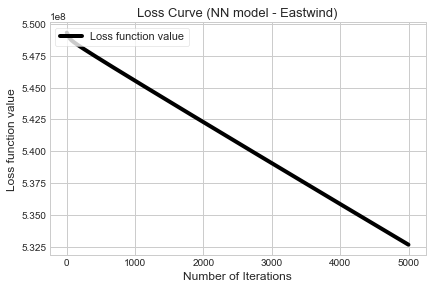

In [23]:
# Plot the loss function value (only work for on-line gradient method)
NN_model_loss_function_value = NN_model.loss_curve_
plt.plot(NN_model_loss_function_value, color='k', label="Loss function value")
plt.legend(loc='upper left', fontsize = 11)
plt.title('Loss Curve (NN model - Eastwind)', fontsize=13)
plt.xlabel('Number of Iterations', fontsize = 12)
plt.ylabel('Loss function value', fontsize = 12)
plt.grid(True)
plt.savefig('Eastwind_NN_model_loss_curve', dpi=200) 
plt.show()

In [24]:
# Save a model 
pickle.dump(NN_model, open('NN_model.sav', 'wb'))

In [25]:
# Load the model from disk
loaded_NN_model = pickle.load(open('NN_model.sav', 'rb'))

In [26]:
# Make predictions
training_y_prediction = loaded_NN_model.predict(training_x)

Training Rsquare: -17.0194
Training RMSE: 32638.8154


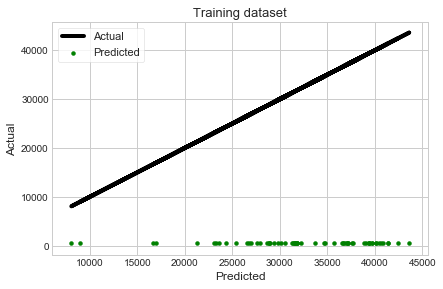

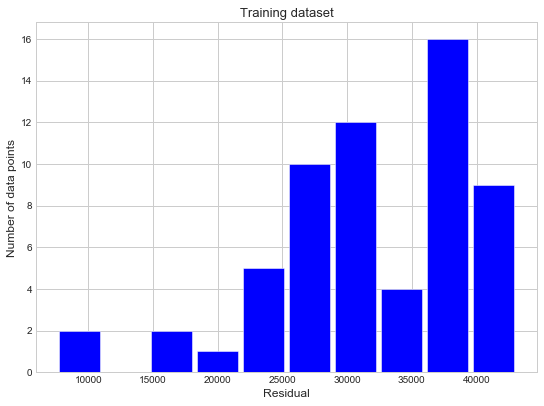

In [27]:
# Calculate Rsquare and RMSE (Root Mean Square Error)
train_Rsquare = loaded_NN_model.score(training_x, training_y)
print('Training Rsquare: %.4f' % (train_Rsquare))
train_RMSE = math.sqrt(mean_squared_error(training_y, training_y_prediction))
print('Training RMSE: %.4f' % (train_RMSE))

# Actual by Predicted plot
plt.plot(training_y, training_y, color='k', label="Actual")
plt.scatter(training_y, training_y_prediction, marker='o', color='g', s=15, label='Predicted')
plt.legend(loc='upper left', fontsize = 11)
plt.title('Training dataset', fontsize=13)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.grid(True)
plt.show()

# Difference error distribution
plt.figure(figsize=(8,6))
train_predicted_residual_y = training_y - training_y_prediction
plt.hist(train_predicted_residual_y, rwidth=0.9, facecolor='blue')
plt.title('Training dataset', fontsize=13)
plt.xlabel('Residual', fontsize = 12)
plt.ylabel('Number of data points', fontsize = 12)
plt.grid(True)
plt.show()

### NN Validation

Validation Rsquare: -12.8570
Validation RMSE: 30828.8322


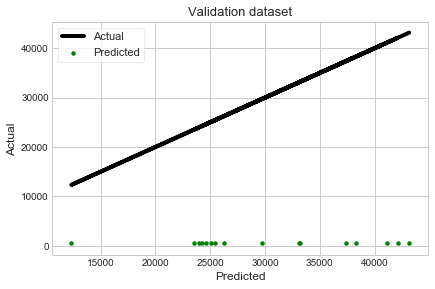

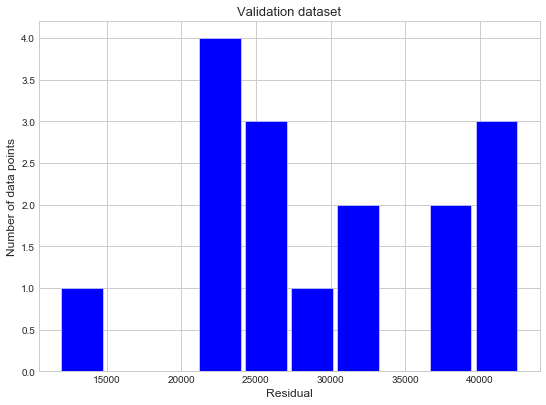

In [28]:
# Predict validation datasets using the regression model
validation_y_prediction = loaded_NN_model.predict(validation_x)

# Calculate Rsquare and RMSE (Root Mean Square Error)
validation_Rsquare = r2_score(validation_y, validation_y_prediction)
print('Validation Rsquare: %.4f' % (validation_Rsquare))
validation_RMSE = math.sqrt(mean_squared_error(validation_y, validation_y_prediction))
print('Validation RMSE: %.4f' % (validation_RMSE))

# Actual by Predicted plot
plt.plot(validation_y, validation_y, color='k', label="Actual")
plt.scatter(validation_y, validation_y_prediction, marker='o', color='g', s=15, label='Predicted')
plt.legend(loc='upper left', fontsize = 11)
plt.title('Validation dataset', fontsize=13)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.grid(True)
plt.show()

# Difference error distribution
plt.figure(figsize=(8,6))
validation_predicted_residual_y = validation_y - validation_y_prediction
plt.hist(validation_predicted_residual_y, rwidth=0.9, facecolor='blue')
plt.title('Validation dataset', fontsize=13)
plt.xlabel('Residual', fontsize = 12)
plt.ylabel('Number of data points', fontsize = 12)
plt.grid(True)
plt.show()

### Support Vector Machine (SVM)

In [29]:
# Select a kernel model
#kernel_model = 'Linear'
#kernel_model = '2nd Polynomial'
#kernel_model = '3rd Polynomial'
kernel_model = 'Radial Basis Function'
#kernel_model = 'Sigmoid'

In [30]:
# Radial Basis Function (RFB) model
svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1, tol=1e-6, epsilon=1e-6, max_iter=-1, verbose=True)
svm_training_y_prediction = svm_model.fit(training_x, training_y).predict(training_x)

[LibSVM]

### SVM Training

Training Rsquare: 0.10424
Training RMSE: 32638.81538


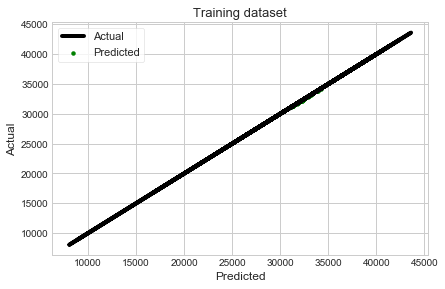

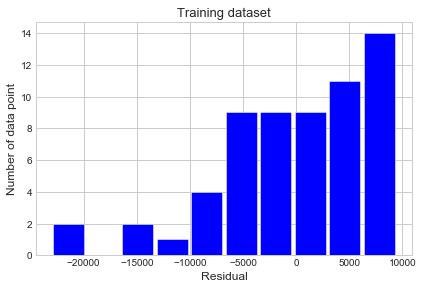

In [31]:
# Calculate Rsquare and RMSE (Root Mean Square Error)
svm_train_Rsquare = svm_model.score(training_x, training_y)
print('Training Rsquare: %.5f' % (svm_train_Rsquare))
svm_train_RMSE = math.sqrt(mean_squared_error(training_y, svm_training_y_prediction))
print('Training RMSE: %.5f' % (train_RMSE))

# Actual by Predicted plot
plt.plot(training_y, training_y, color='k', label="Actual")
plt.scatter(svm_training_y_prediction, svm_training_y_prediction, marker='o', color='g', s=15, label='Predicted')
plt.legend(loc='upper left', fontsize = 11)
plt.title('Training dataset', fontsize=13)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.grid(True)
plt.show()

# Difference error distribution
svm_train_predicted_residual_y = training_y - svm_training_y_prediction
plt.hist(svm_train_predicted_residual_y, rwidth=0.9, facecolor='blue')
plt.title('Training dataset', fontsize=13)
plt.xlabel('Residual', fontsize = 12)
plt.ylabel('Number of data point', fontsize = 12)
plt.grid(True)
plt.show()

### SVM Validation

Validation Rsquare: 0.02977
Validation RMSE: 8157.55910


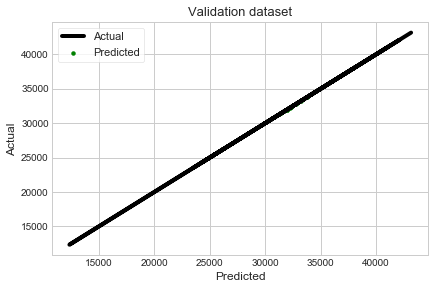

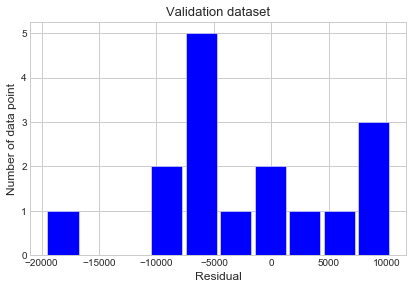

In [32]:
# Predict validation datasets using the regression model
svm_validation_y_prediction = svm_model.predict(validation_x)

# Calculate Rsquare and RMSE (Root Mean Square Error)
svm_validation_Rsquare = r2_score(validation_y, svm_validation_y_prediction)
print('Validation Rsquare: %.5f' % (svm_validation_Rsquare))
svm_validation_RMSE = math.sqrt(mean_squared_error(validation_y, svm_validation_y_prediction))
print('Validation RMSE: %.5f' % (svm_validation_RMSE))

# Actual by Predicted plot
plt.plot(validation_y, validation_y, color='k', label="Actual")
plt.scatter(svm_validation_y_prediction, svm_validation_y_prediction, marker='o', color='g', s=15, label='Predicted')
plt.legend(loc='upper left', fontsize = 11)
plt.title('Validation dataset', fontsize=13)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.grid(True)
plt.show()

# Difference error distribution
svm_validation_predicted_residual_y = validation_y - svm_validation_y_prediction
plt.hist(svm_validation_predicted_residual_y, rwidth=0.9, facecolor='blue')
plt.title('Validation dataset', fontsize=13)
plt.xlabel('Residual', fontsize = 12)
plt.ylabel('Number of data point', fontsize = 12)
plt.grid(True)
plt.show()

### Gaussian Process

In [33]:
# Instantiate a Gaussian Process model
kernel = ConstantKernel(1, (1e-3, 1e3)) * RBF(1, (1e-3, 1e3))
GP_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=1)

In [34]:
# Perform model fit
attendance_GP_model = GP_model.fit(training_x, training_y)

In [35]:
# Print the log-marginal-likelihood
attendance_GP_model.log_marginal_likelihood(theta=None, eval_gradient=False)

-33510055.396283194

In [36]:
# Save a model 
pickle.dump(attendance_GP_model, open('GP_model.sav', 'wb'))

In [37]:
# Load the model from disk
attendance_loaded_GP_model = pickle.load(open('GP_model.sav', 'rb'))

In [38]:
# Make predictions
attendance_training_y_prediction, attendance_training_y_std = attendance_loaded_GP_model.predict(training_x, return_std=True)

### GP Training

Training Rsquare: 1.0000
Training RMSE: 0.0000


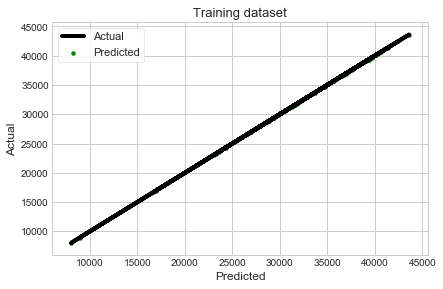

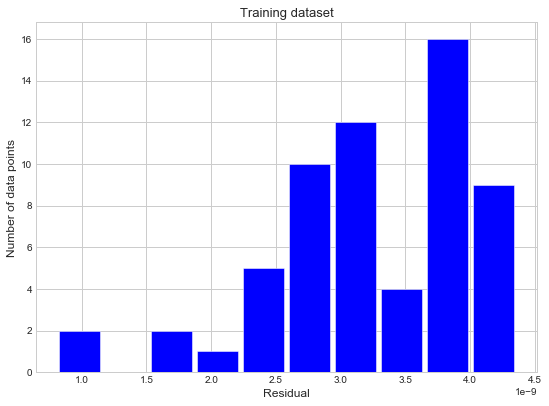

In [39]:
# Calculate Rsquare and RMSE (Root Mean Square Error)
attendance_train_Rsquare = attendance_loaded_GP_model.score(training_x, training_y)
print('Training Rsquare: %.4f' % (attendance_train_Rsquare))
attendance_train_RMSE = math.sqrt(mean_squared_error(training_y, attendance_training_y_prediction))
print('Training RMSE: %.4f' % (attendance_train_RMSE))

# Actual by Predicted plot
plt.plot(training_y, training_y, color='k', label="Actual")
plt.scatter(training_y, attendance_training_y_prediction, marker='o', color='g', s=15, label='Predicted')
plt.legend(loc='upper left', fontsize = 11)
plt.title('Training dataset', fontsize=13)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.grid(True)
plt.show()

# Difference error distribution
plt.figure(figsize=(8,6))
attendance_train_predicted_residual_y = training_y - attendance_training_y_prediction
plt.hist(attendance_train_predicted_residual_y, rwidth=0.9, facecolor='blue')
plt.title('Training dataset', fontsize=13)
plt.xlabel('Residual', fontsize = 12)
plt.ylabel('Number of data points', fontsize = 12)
plt.grid(True)
plt.show()

### GP Validation

Validation Rsquare: -13.2306
Validation RMSE: 31241.7329


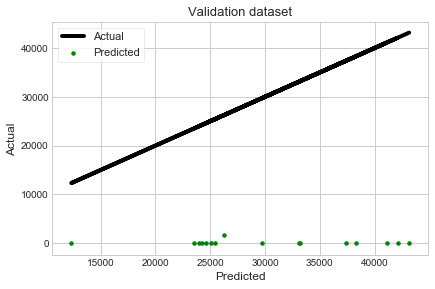

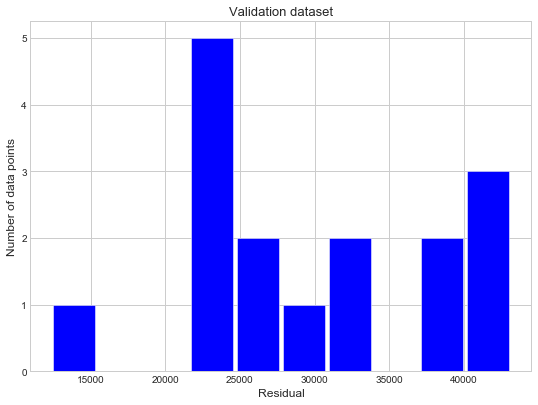

In [40]:
# Predict validation datasets using the regression model
attendance_validation_y_prediction = attendance_loaded_GP_model.predict(validation_x)

# Calculate Rsquare and RMSE (Root Mean Square Error)
attendance_validation_Rsquare = r2_score(validation_y, attendance_validation_y_prediction)
print('Validation Rsquare: %.4f' % (attendance_validation_Rsquare))
attendance_validation_RMSE = math.sqrt(mean_squared_error(validation_y, attendance_validation_y_prediction))
print('Validation RMSE: %.4f' % (attendance_validation_RMSE))

# Actual by Predicted plot
plt.plot(validation_y, validation_y, color='k', label="Actual")
plt.scatter(validation_y, attendance_validation_y_prediction, marker='o', color='g', s=15, label='Predicted')
plt.legend(loc='upper left', fontsize = 11)
plt.title('Validation dataset', fontsize=13)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.grid(True)
plt.show()

# Difference error distribution
plt.figure(figsize=(8,6))
attendance_validation_predicted_residual_y = validation_y - attendance_validation_y_prediction
plt.hist(attendance_validation_predicted_residual_y, rwidth=0.9, facecolor='blue')
plt.title('Validation dataset', fontsize=13)
plt.xlabel('Residual', fontsize = 12)
plt.ylabel('Number of data points', fontsize = 12)
plt.grid(True)
plt.show()

### Toc

In [41]:
# Print the elapsed time
end_time = time.time()
elapsed_time = round(end_time-start_time,1)
print(elapsed_time)
print('')
print('This is the elapsed time in second.')

25.0

This is the elapsed time in second.
